# Gaussian Mixture

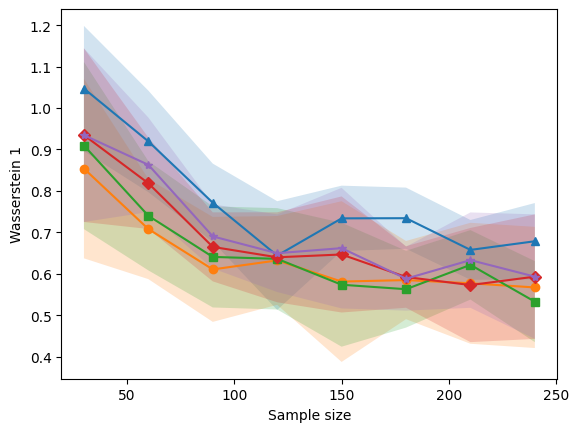

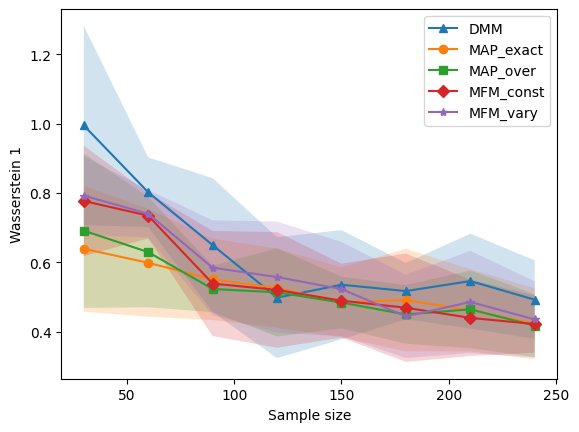

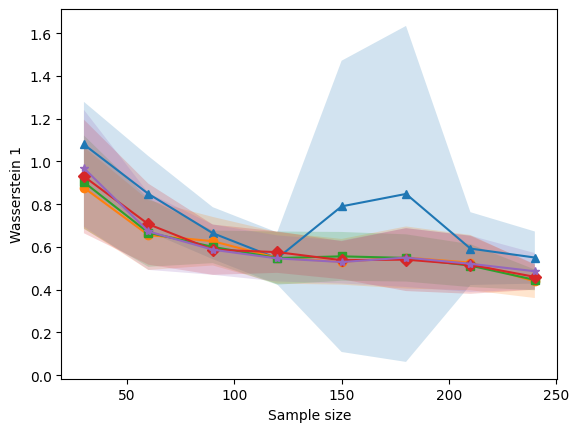

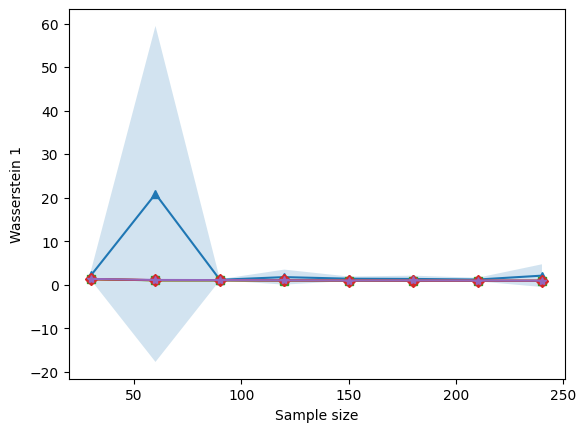

In [ ]:
#!pip install cvxpy

import numpy as np
import math
import random
import matplotlib.pyplot as plt

from DP import *
from bayes import *   
from em_bayes import *
from dmm import DMM
from model_gm import ModelGM, sample_gm
from discrete_rv import wass

## Model define
model_list = []
model_list.append(ModelGM(w=[0.3, 0.2, 0.3, 0.2], x=[-3, -1, 1, 3], std=1))
model_list.append(ModelGM(w=[0.25, 0.25, 0.25, 0.25], x=[-1.5, -1, 1, 3], std=1))
model_list.append(ModelGM(w=[0.4, 0.1, 0.25, 0.25], x=[-3, -1, 1, 3], std=1))
model_list.append(ModelGM(w=np.ones(7)/7, x=2*np.arange(7)-6, std=1))

n_list = 30*(np.arange(8)+1)
repeat = 10
wass_list = np.zeros([4, len(n_list), 5, repeat])

for m in range(len(model_list)):    
    
    model = model_list[m]
    kexact = len(model.centers)
    kmax = 2*kexact 
    kmin = 2
    
    for i, n in enumerate(n_list):         
                
        for b in range(repeat):
            
            x = sample_gm(model, n, seed=b)              
            
            dmm = DMM(k=np.min([kexact, 4]), interval=[-7,7], sigma=1)    
            dmm_est = dmm.estimate(x)
            map1, map2, bayes1, bayes2 = em_msel(x, kmin, kmax, kexact, interval=[-6,6], lam1=1, lam2=np.exp(-0.05*np.log(n)**2/np.log(np.log(n))), kappa=1)
            
            wass_list[m,i,0,b] = wass(dmm_est.mean_rv(), model.mean_rv())
            wass_list[m,i,1,b] = wass(map1.mean_rv(), model.mean_rv())
            wass_list[m,i,2,b] = wass(map2.mean_rv(), model.mean_rv())
            wass_list[m,i,3,b] = wass(bayes1.mean_rv(), model.mean_rv())
            wass_list[m,i,4,b] = wass(bayes2.mean_rv(), model.mean_rv())

## PLOT

wass_mean = wass_list.mean(axis=3)
wass_std = wass_list.std(axis=3)

markers=['^','o','s','D','*']
name = ['DMM', 'MAP_exact', 'MAP_over', 'MFM_const', 'MFM_vary']
    
for m in range(len(model_list)):      
    plt.figure()       
    for i in range(5): 
        plt.plot(n_list, wass_mean[m,:,i], marker=markers[i], label=name[i])        
        plt.fill_between(n_list, wass_mean[m,:,i]-wass_std[m,:,i], wass_mean[m,:,i]+wass_std[m,:,i], alpha=0.2)
    plt.legend()
    plt.xlabel("Sample size")
    plt.ylabel("Wasserstein 1")
    plt.title("Gaussian mixtures")  
    plt.savefig("mixing"+str(m+1)+".png")   


# Student Mixture 

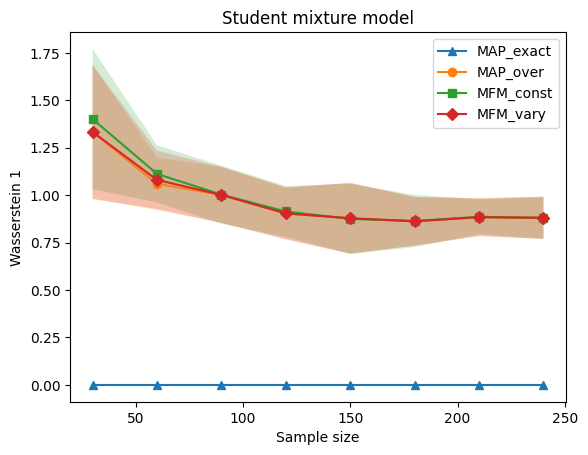

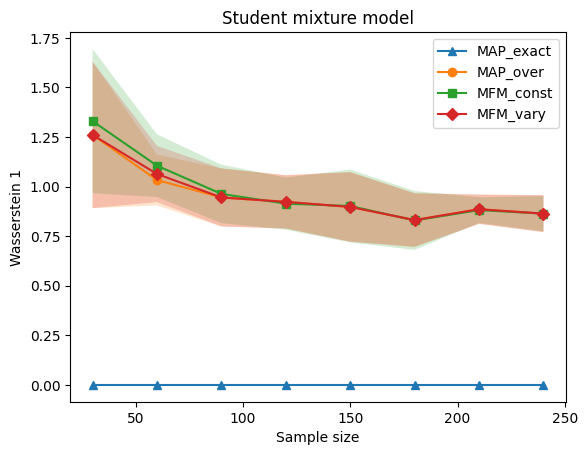

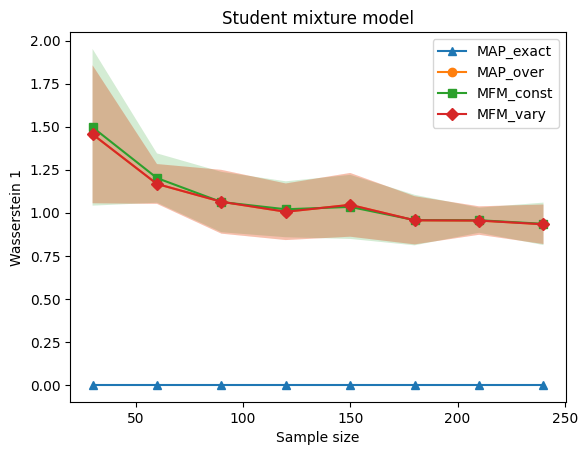

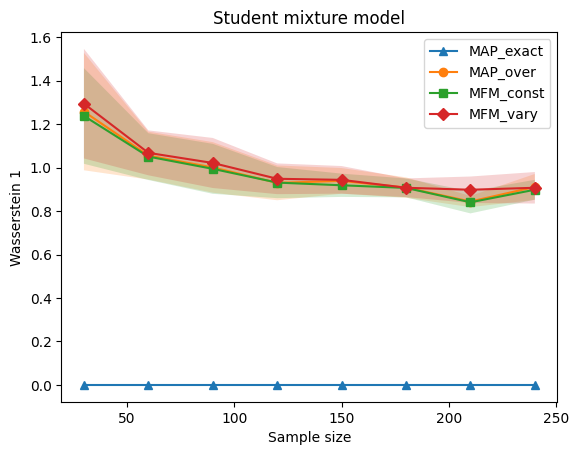

In [4]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

from DP import *
from bayes import *   
from em_bayes import *
from dmm import DMM
from discrete_rv import wass
from model_student_mixture import ModelStudentMixture, sample_student_mix

DEGREE_FREEDOM = 5
centers_list = np.array([-3, -1, 1, 3])*2

## Model define
model_list = []
model_list.append(ModelStudentMixture(w=[0.3, 0.2, 0.3, 0.2], x=centers_list, std=1, nu=DEGREE_FREEDOM))
model_list.append(ModelStudentMixture(w=[0.25, 0.25, 0.25, 0.25], x=centers_list, std=1, nu= DEGREE_FREEDOM))
model_list.append(ModelStudentMixture(w=[0.4, 0.1, 0.25, 0.25], x=centers_list, std=1, nu=DEGREE_FREEDOM))
model_list.append(ModelStudentMixture(w=np.ones(7)/7, x=2*np.arange(7)-6, std=1, nu=DEGREE_FREEDOM))

n_list = 30*(np.arange(8)+1)
repeat = 10
wass_list = np.zeros([4, len(n_list), 5, repeat])

for m in range(len(model_list)):    
    
    model = model_list[m]
    kexact = len(model.centers)
    kmax = 2*kexact 
    kmin = 2
    
    for i, n in enumerate(n_list):         
                
        for b in range(repeat):
            
            x = sample_student_mix(model, n, seed=b)              
            
            #dmm = DMM(k=np.min([kexact, 4]), interval=[-7,7], sigma=1)    
            #dmm_est = dmm.estimate(x)
            map1, map2, bayes1, bayes2 = em_msel(x, kmin, kmax, kexact, interval=[-6,6], lam1=1, lam2=np.exp(-0.05*np.log(n)**2/np.log(np.log(n))), kappa=1)
            
            #wass_list[m,i,0,b] = wass(dmm_est.mean_rv(), model.mean_rv())
            wass_list[m,i,1,b] = wass(map1.mean_rv(), model.mean_rv())
            wass_list[m,i,2,b] = wass(map2.mean_rv(), model.mean_rv())
            wass_list[m,i,3,b] = wass(bayes1.mean_rv(), model.mean_rv())
            wass_list[m,i,4,b] = wass(bayes2.mean_rv(), model.mean_rv())

## PLOT

wass_mean = wass_list.mean(axis=3)
wass_std = wass_list.std(axis=3)

markers=['^','o','s','D','*']
name = ['MAP_exact', 'MAP_over', 'MFM_const', 'MFM_vary']
    
for m in range(len(model_list)):      
    plt.figure()       
    for i in range(4): 
        plt.plot(n_list, wass_mean[m,:,i], marker=markers[i], label=name[i])        
        plt.fill_between(n_list, wass_mean[m,:,i]-wass_std[m,:,i], wass_mean[m,:,i]+wass_std[m,:,i], alpha=0.2)
    
    plt.legend()
    plt.xlabel("Sample size")
    plt.ylabel("Wasserstein 1") 
    plt.title("Student mixture model") 
    plt.savefig("mixing"+str(m+1)+".png")   

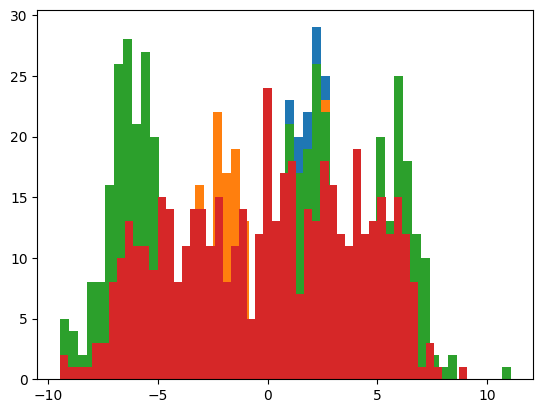

In [14]:
model_list = []
model_list.append(ModelStudentMixture(w=[0.3, 0.2, 0.3, 0.2], x=centers_list, std=1, nu=DEGREE_FREEDOM))
model_list.append(ModelStudentMixture(w=[0.25, 0.25, 0.25, 0.25], x=centers_list, std=1, nu= DEGREE_FREEDOM))
model_list.append(ModelStudentMixture(w=[0.4, 0.1, 0.25, 0.25], x=centers_list, std=1, nu=DEGREE_FREEDOM))
model_list.append(ModelStudentMixture(w=np.ones(7)/7, x=2*np.arange(7)-6, std=1, nu=DEGREE_FREEDOM))

n = 500

for i in range(len(model_list)):
    plt.hist(sample_student_mix(model_list[i], n, seed=b), bins =50  )
plt.show()